# MIToS.jl 
## Mutual Information Tools for protein Sequence analysis in Julia

MIToS was born from the need for a better pseudocount in Mutual Information (MI) calculation:

**"We demonstrate how the predictive performance of the method depends strongly on the number of sequence clusters rather than the number of sequences in the MSA, and those MSAs with <400 clusters tend to display very low predictive performance values."** Buslje, Cristina Marino, et al. *Correction for phylogeny, small number of observations and data redundancy improves the identification of coevolving amino acid pairs using mutual information.* Bioinformatics 25.9 (2009): 1125-1131.

The estimation of MI between MSA columns (and their Z scores) takes  

$$ ncol ⋅ (ncol-1) ⋅ 0.5 ⋅ nseq ⋅ (nsamples+1)$$  
counting operations. The implementation should be fast...  

**"The software is written in C, it is fast and suitable to analyze a large number of sequences."** Buslje, Cristina Marino, et al. *Correction for phylogeny, small number of observations and data redundancy improves the identification of coevolving amino acid pairs using mutual information.* Bioinformatics 25.9 (2009): 1125-1131.

#### Why Julia?

**"Julia is designed to be easy and fast. [...] Julia shows that one can have machine performance without sacrificing human convenience."** Bezanson, Jeff, et al. *"Julia: A fresh approach to numerical computing."* arXiv preprint arXiv:1411.1607 (2014).


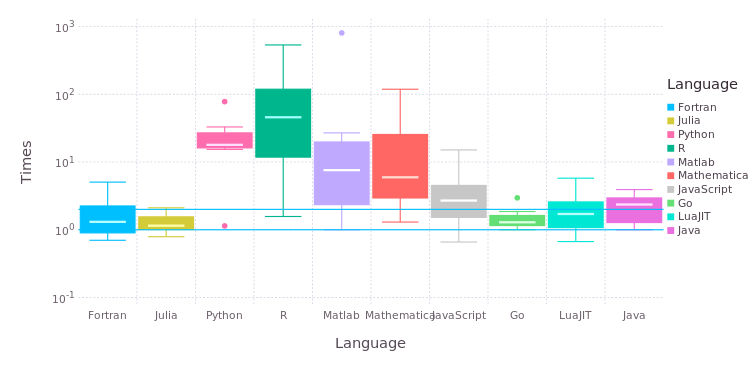

In [1]:
using DataFrames, Gadfly

set_default_plot_size(20cm, 10cm)

julia_benchmark = readtable("benchmark.csv", separator=';') # Read a CSV file into a DataFrame

julia_benchmark = melt(julia_benchmark, :Benchmark) # From wide to long format
names!(julia_benchmark, [:Language, :Times, :Benchmark]) # Rename the new columns

julia_benchmark = julia_benchmark[julia_benchmark[:Language] .!= :Octave, : ] # Octave is too slow

plot(julia_benchmark, x=:Language, y=:Times, color=:Language, 
     yintercept=[1.0, 2.0], Geom.hline, 
     Geom.boxplot, Scale.y_log10)

**Even though Julia could be slower than C, MIToS implementation of ZMIp is faster than the original C implementation.**  

The example MSA (*Pfam*: *PF13673*) has 5912 sequences and 127 columns (without insert columns)  

```
# Execution time of MIToS (Julia) implemantion
time Buslje09.jl -f PF13673.stockholm.gz 

real	0m31.462s
user	0m31.438s
sys     0m0.560s

# Using MIToS to covert from Stockholm to FASTA
julia -e 'using MIToS.MSA; write("PF13673.fasta", read("PF13673.stockholm.gz", Stockholm), FASTA)'

# Execution time of the original C implemantion
time mutualinfo_matrix_cluster_pseudocount_zscore_row_w -fsa PF13673.fasta > out

real	1m26.523s
user	1m26.607s
sys     0m0.004s
```